In [1]:
# prompt: connect goole drive with collab

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
data_dir="/content/drive/MyDrive/Soil"

In [3]:
import tensorflow as tf

data_dir="/content/drive/MyDrive/Soil"
img_height, img_width = 128, 128
batch_size = 32

# Load the entire dataset
full_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Splitting the full dataset into training and validation sets
train_ds = full_ds.take(round(0.9 * len(full_ds)))
val_ds = full_ds.skip(round(0.9 * len(full_ds)))

# Create the test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 168 files belonging to 5 classes.
Using 152 files for training.
Found 168 files belonging to 5 classes.
Using 16 files for validation.


In [4]:
class_names = test_ds.class_names
print(class_names)

['Clay Soil', 'Loam', 'Loamy Sand', 'Sand soil', 'Sandy Loam']


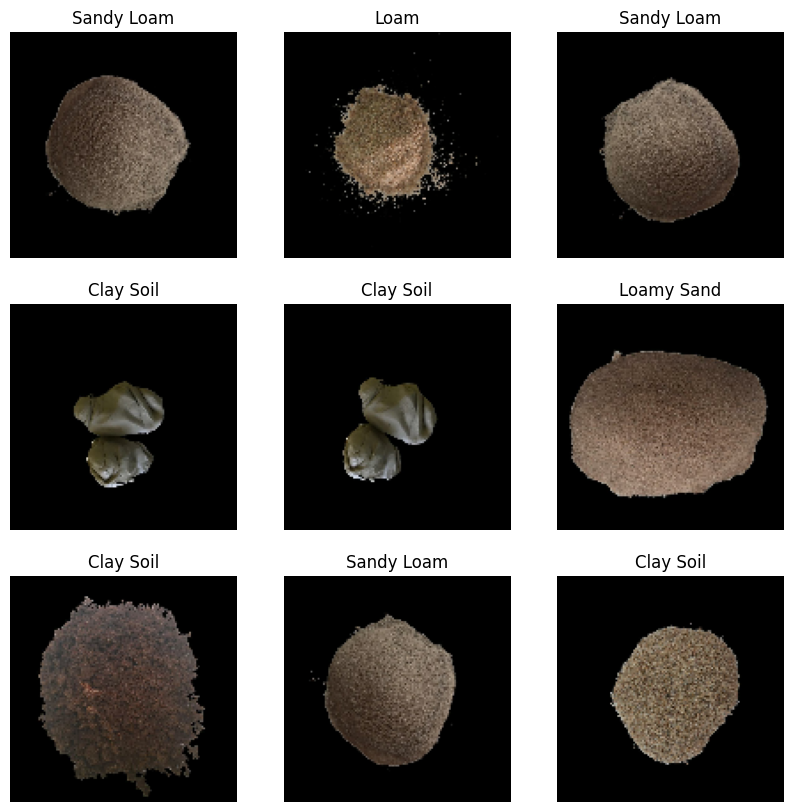

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
normalization_layer = layers.Rescaling(1./255)

In [10]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.94336706


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout with a dropout rate of 0.5
    layers.Dense(num_classes)
])


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
4/4 [==============================] - 5s 1s/step - loss: 1.6458 - accuracy: 0.2734 - val_loss: 1.5891 - val_accuracy: 0.2083
Epoch 2/15
4/4 [==============================] - 4s 949ms/step - loss: 1.5477 - accuracy: 0.2812 - val_loss: 1.5130 - val_accuracy: 0.3333
Epoch 3/15
4/4 [==============================] - 2s 544ms/step - loss: 1.4841 - accuracy: 0.3828 - val_loss: 1.4275 - val_accuracy: 0.3333
Epoch 4/15
4/4 [==============================] - 2s 537ms/step - loss: 1.3966 - accuracy: 0.4766 - val_loss: 1.3699 - val_accuracy: 0.4167
Epoch 5/15
4/4 [==============================] - 2s 543ms/step - loss: 1.2028 - accuracy: 0.5781 - val_loss: 1.2469 - val_accuracy: 0.4167
Epoch 6/15
4/4 [==============================] - 2s 650ms/step - loss: 1.1091 - accuracy: 0.5234 - val_loss: 1.0042 - val_accuracy: 0.6667
Epoch 7/15
4/4 [==============================] - 4s 948ms/step - loss: 0.8902 - accuracy: 0.6641 - val_loss: 0.9738 - val_accuracy: 0.7500
Epoch 8/15
4/4 [=======

In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import Input

num_classes = len(class_names)  # Assuming class_names is defined somewhere in your code

# Load pre-trained VGG16 model
vgg16_model = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(128, 128, 3)))

# Freeze pre-trained layers to avoid overfitting
for layer in vgg16_model.layers:
    layer.trainable = False

# Create a new Sequential model
model2 = Sequential([
    vgg16_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes)
])

# Compile the model with optimizer, loss function, and metrics
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model (you can replace this with your fit function)
epochs = 15
history2 = model2.fit(train_ds, validation_data=val_ds, epochs=epochs)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/15
4/4 [==============================] - 35s 9s/step - loss: 16.8877 - accuracy: 0.3516 - val_loss: 1.9708 - val_accuracy: 0.7083
Epoch 2/15
4/4 [==============================] - 32s 9s/step - loss: 3.4815 - accuracy: 0.7266 - val_loss: 2.0729 - val_accuracy: 0.8333
Epoch 3/15
4/4 [==============================] - 32s 8s/step - loss: 1.5926 - accuracy: 0.8438 - val_loss: 2.1774 - val_accuracy: 0.8333
Epoch 4/15
4/4 [==============================] - 36s 10s/step - loss: 0.9070 - accuracy: 0.9297 - val_loss: 0.9549 - val_accuracy: 0.9583
Epoch 5/15
4/4 [==============================] - 36s 10s/step - loss: 0.7310 - accuracy: 0.9609 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 6/15
4/4 [==============================] - 32s 9s/step - loss: 0.9583 - accuracy: 0.9375 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/15
4/4 [==============================] - 31s 8s/step - loss: 0.1820 - accuracy: 0.9844 - val_lo

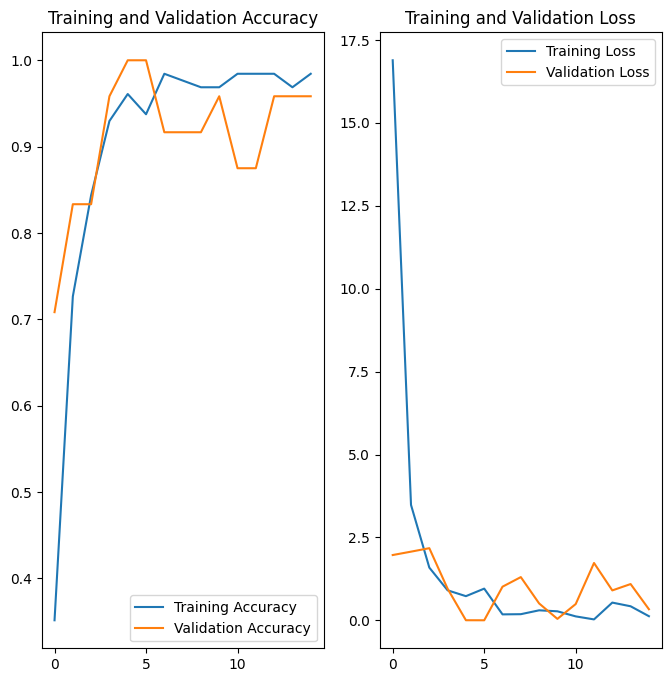

In [15]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

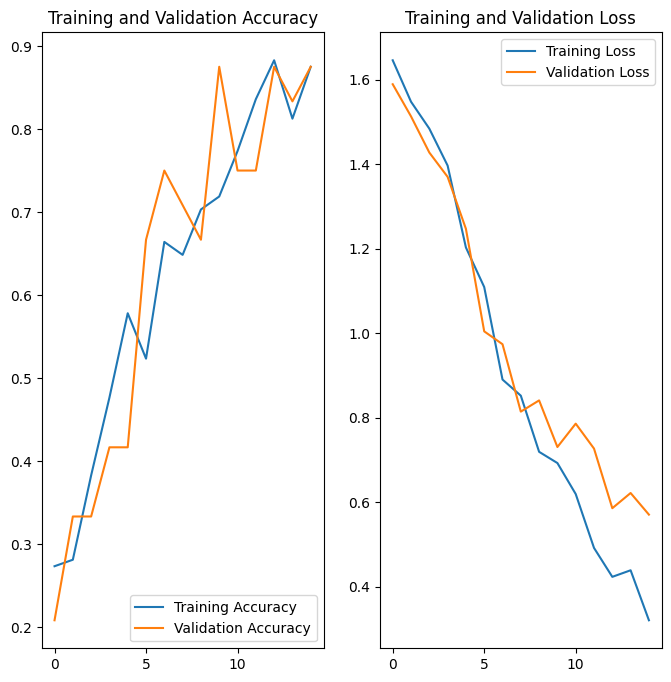

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
test_result = model.evaluate(test_ds)
print(test_result)

1/1 [==============================] - 3s 3s/step - loss: 0.9870 - accuracy: 0.6250
[0.986998438835144, 0.625]


In [18]:
test_result = model2.evaluate(test_ds)
print(test_result)

1/1 [==============================] - 3s 3s/step - loss: 0.5389 - accuracy: 0.8750
[0.5388844609260559, 0.875]


In [24]:
import tensorflow as tf
import numpy as np

# Assuming you have class_names and model defined appropriately.
# Ensure that img_height and img_width are defined
img_height = 128
img_width = 128

# Provide the path to the image you want to test
image_path = "/content/drive/MyDrive/Soil/Loam/inverted_Sample15.150.jpg"

# Load and preprocess the image
img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Get the predicted class and confidence
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(predicted_class, confidence)
)


1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Loam with a 99.98 percent confidence.


In [25]:
import tensorflow as tf
import numpy as np

# Assuming you have class_names and model defined appropriately.
# Ensure that img_height and img_width are defined
img_height = 128
img_width = 128

# Provide the path to the image you want to test
image_path = "/content/drive/MyDrive/Soil/Loam/inverted_Sample15.150.jpg"

# Load and preprocess the image
img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Get the predicted class and confidence
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(predicted_class, confidence)
)


1/1 [==============================] - 0s 205ms/step
This image most likely belongs to Loam with a 100.00 percent confidence.


In [26]:
# prompt: how do the read the above output and save it in a variable

predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)


In [27]:
print(predicted_class)

Loam


In [28]:
import csv

# Function to read CSV file and create a dictionary mapping crops to soil types
def read_soil_types(csv_file):
    crop_soil = {}
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            crop_soil[row['Crop']] = row['Soil_Type']
    return crop_soil

# Function to check which crops can be grown in a given soil type
def crops_for_soil(crop_soil_mapping, input_soil):
    suitable_crops = [crop for crop, soil in crop_soil_mapping.items() if soil == input_soil]
    return suitable_crops

# Read the CSV file and create a mapping of crops to soil types
crop_soil_mapping = read_soil_types('/content/drive/MyDrive/Soil/Crop_Soil_Type.csv')

# Example: Assume the model predicts the soil type and stores it in predicted_soil_type variable
predicted_soil_type = predicted_class  # Replace this with the output of your model prediction

# Find crops suitable for the provided soil type (predicted by the model)
suitable_crops = crops_for_soil(crop_soil_mapping, predicted_soil_type)

if suitable_crops:
    print("Crops that can be grown in", predicted_soil_type, "soil:", suitable_crops)
else:
    print("No crops found for the provided soil type.")


Crops that can be grown in Loam soil: ['Maize', 'Chickpea', 'Kidney beans', 'Pigeon beans', 'Moth beans', 'Mung beans', 'Black gram', 'Lentils', 'Watermelon', 'Muskmelon', 'Apple', 'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee']
